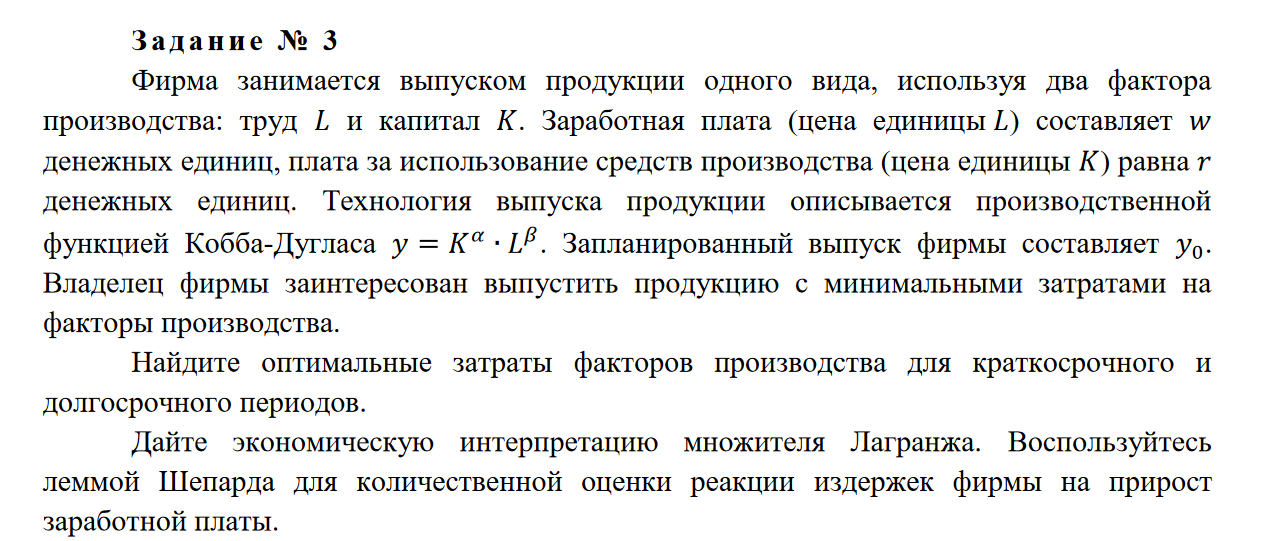

In [1]:
from scipy.optimize import minimize
import numpy as np

# Параметры задачи
alpha = 0.3  # Примерное значение alpha для демонстрации
beta = 0.7   # Примерное значение beta для демонстрации
w = 10       # Заработная плата за единицу труда
r = 20       # Плата за использование капитала за единицу
y0 = 100     # Запланированный уровень производства

# Целевая функция затрат в долгосрочном периоде
def cost_function(x):
    L, K = x
    return w*L + r*K

# Ограничение на уровень производства
def production_constraint(x):
    L, K = x
    return K**alpha * L**beta - y0

# Начальное приближение
x0 = [1, 1]

# Ограничения
cons = ({'type': 'eq', 'fun': production_constraint})

# Решение задачи минимизации затрат
res = minimize(cost_function, x0, constraints=cons, method='SLSQP')

# Оптимальные значения L и K
L_opt_long, K_opt_long = res.x

L_opt_long, K_opt_long, res.fun


(158.7457204122296, 34.016942210922075, 2267.7960483407373)

In [2]:
from scipy.optimize import fsolve

# Фиксированное значение K для краткосрочного периода
K_fixed = K_opt_long  # Используем оптимальное значение K из долгосрочного периода для демонстрации

# Функция для нахождения L, при заданном y0 и фиксированном K
def find_L(L):
    return K_fixed**alpha * L**beta - y0

# Находим оптимальное значение L для краткосрочного периода
L_opt_short = fsolve(find_L, x0[0])[0]

# Рассчитываем затраты для найденного L и фиксированного K
C_short_term = w * L_opt_short + r * K_fixed

L_opt_short, C_short_term


(158.74572045228373, 2267.796048741279)

In [4]:
from sympy import symbols, diff

# Определение символов
w, r, L, K, alpha, beta, y0 = symbols('w r L K alpha beta y0')

# Функция затрат C = w*L + r*K, где L и K функции от w, r, и y0
C = w*L + r*K

# Производная функции затрат по w
dC_dw = diff(C, w)

dC_dw


L